In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style for plots
sns.set(style="whitegrid")

In [144]:
# Load file into dataframe
df = pd.read_csv("game_results.csv")

In [142]:
# Win rate per matchup - overview
win_counts = df.groupby(["matchup", "winner"]).size().unstack().fillna(0)
win_counts.columns.name = None # remove unnecessary'winner' label
win_counts["Total"] = win_counts.sum(axis=1)
win_rates = win_counts.div(win_counts["Total"], axis=0) * 100
win_rates[["agent1", "agent2", "draw"]].round(2)

win_rates_display = win_rates.rename(columns={
    "agent1": "Agent 1 Win Rate (%)",
    "agent2": "Agent 2 Win Rate (%)",
    "draw": "Draw Rate (%)"
})

# Rename index
win_rates_display.index.name = "Matchup"

# Format matchup labels
win_rates_display.index = win_rates_display.index.map(matchup_labels)

# Show table
win_rates_display[["Agent 1 Win Rate (%)", "Agent 2 Win Rate (%)", "Draw Rate (%)"]].round(2)


,Agent 1 Win Rate (%),Agent 2 Win Rate (%),Draw Rate (%)
Matchup,,,
Minimax vs ML,100.0,0.0,0.0
Random vs Smart,3.0,96.8,0.2
Smart vs Minimax,3.6,96.4,0.0


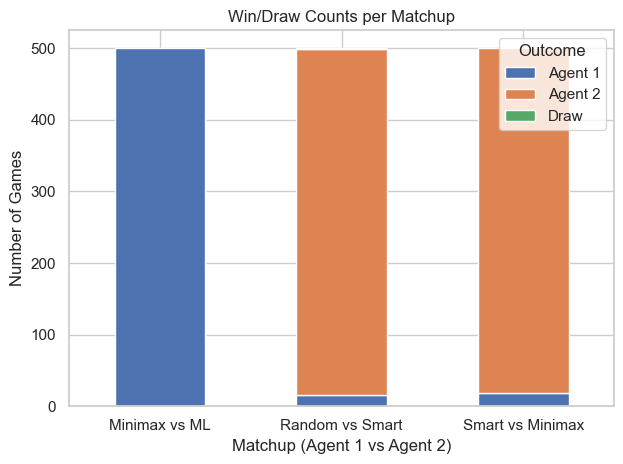

In [101]:
# Wins per matchup - bar chart

# More user-friendly x-axis labels
matchup_labels = {
    "random_vs_smart": "Random vs Smart",
    "smart_vs_minimax": "Smart vs Minimax",
    "minimax_vs_ml": "Minimax vs ML"
}

# Create new column for the labels
df["matchup_label"] = df["matchup"].map(matchup_labels)

win_counts[["agent1", "agent2", "draw"]].plot(kind="bar", stacked=True)

# Colour keys
plt.legend(title="Outcome", labels=["Agent 1", "Agent 2", "Draw"], loc="upper right")

plt.xticks(ticks=range(len(win_counts)), labels=win_counts.index.map(matchup_labels), rotation=0)
plt.title("Win/Draw Counts per Matchup")
plt.ylabel("Number of Games")
plt.xlabel("Matchup (Agent 1 vs Agent 2)")
plt.tight_layout()
plt.show()

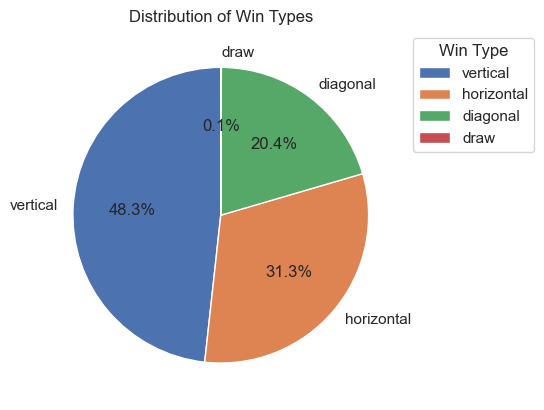

In [103]:
# Pie chart
win_type_counts = df["win_type"].value_counts()
win_type_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)

# Colour keys
plt.legend(
    labels=win_type_counts.index, 
    title="Win Type",
    loc="upper left", 
    bbox_to_anchor=(1, 1) # place outside chart
)

plt.title("Distribution of Win Types")
plt.ylabel("")
plt.show()

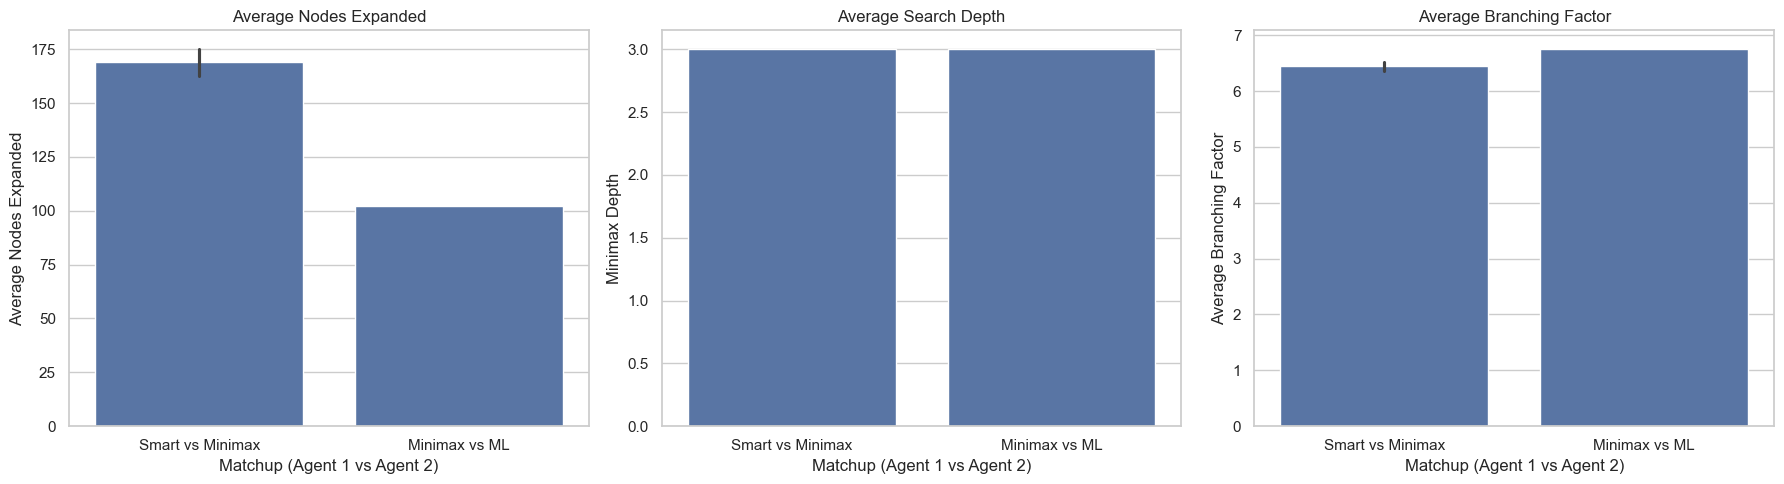

In [122]:
# Search performance
minimax_games = df[df["matchup"].str.contains("minimax")]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=minimax_games, x="matchup_label", y="minimax_nodes", ax=axes[0])
axes[0].set_title("Average Nodes Expanded")
axes[0].set_xlabel("Matchup (Agent 1 vs Agent 2)")
axes[0].set_ylabel("Average Nodes Expanded")

sns.barplot(data=minimax_games, x="matchup_label", y="minimax_depth", ax=axes[1])
axes[1].set_title("Average Search Depth")
axes[1].set_xlabel("Matchup (Agent 1 vs Agent 2)")
axes[1].set_ylabel("Minimax Depth")

sns.barplot(data=minimax_games, x="matchup_label", y="avg_branching_factor", ax=axes[2])
axes[2].set_title("Average Branching Factor")
axes[2].set_xlabel("Matchup (Agent 1 vs Agent 2)")
axes[2].set_ylabel("Average Branching Factor")

plt.tight_layout()
plt.show()

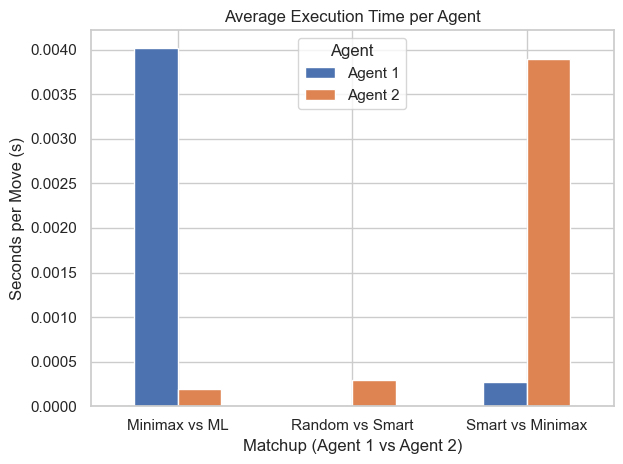

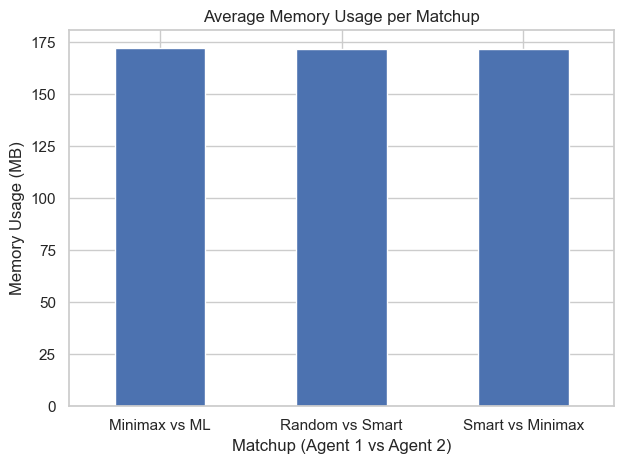

In [107]:
# Execution time & memory usage

# Average by matchup
df_grouped = df.groupby("matchup_label").mean(numeric_only=True)

df_grouped[["avg_time_agent1", "avg_time_agent2"]].plot(kind="bar")
plt.legend(title="Agent", labels=["Agent 1", "Agent 2"])
plt.title("Average Execution Time per Agent")
plt.ylabel("Seconds per Move (s)")
plt.xlabel("Matchup (Agent 1 vs Agent 2)")
plt.xticks(rotation=0) # keep x-axis labels horizontal
plt.tight_layout()
plt.show()

df_grouped["memory_mb"].plot(kind="bar", title="Average Memory Usage per Matchup", ylabel="Memory Usage (MB)")
plt.xticks(rotation=0)
plt.xlabel("Matchup (Agent 1 vs Agent 2)")
plt.tight_layout()
plt.show()

In [131]:
# Export summary table

df_grouped.index.name = "Matchup"

# Make headers user-friendly
df_grouped.rename(columns={
    "moves": "Average Moves",
    "minimax_nodes": "Average Nodes Expanded",
    "minimax_depth": "Average Search Depth",
    "avg_time_agent1": "Average Time Agent 1",
    "avg_time_agent2": "Average Time Agent 2",
    "memory_mb": "Average Memory Usage (MB)",
    "avg_branching_factor": "Average Branching Factor",
    "avg_heuristic_delta": "Average Heuristic Delta"
}, inplace=True)

df_grouped.round(3).to_csv("summary_metrics.csv")